<a href="https://colab.research.google.com/github/BrenoJesusFernandes/petrobras-tweets-analysis/blob/main/Analise_de_Sentimento_Tweets_Petrobras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Analise de sentimentos utilizando um modelo transformers especializado em textos financeiros (FinBERT)**
---

In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética
Aluno1 = '41890590, Breno de Jesus Fernandes' #@param {type:"string"} 
Aluno2 = '31895204, Fernando Goncalves dos Santos' #@param {type:"string"}
Aluno3 = '31725279, Gustavo Businhani da silva' #@param {type:"string"}


# **Resumo**

Ultimo a ser feito.

Introducao. Referencial Teorico. Conceitos chaves. Exemplo de aplicacao. Exemplo de codigo. Ideia de projeto. Conclusao.

# **Conceitos Chave**





## 1. *Analise de sentimento*
## 2. *Transformers* 
## 3. *FinBERT* 









# **Referencial Teórico**



## **Classificacao de sentimentos em textos financeiros**

Há um interesse crescente nas tarefas de mineração de textos financeiros. Ao longo dos últimos anos, o progresso do processamento de linguagem natural (NLP) baseado em deep learning avançou rapidamente [[1]](#scrollTo=Refer_ncias).


Um progresso significativo foi feito com ELMo (Embeddings from Language Model) e redes neurais do tipo LSTM (Long Short-Term Memory) na classificacao de sentimentos de texto financeiro. No entanto, como esses modelos requerem grandes quantidades de dados de treinamento rotulados e demandam alto custo computacional, tornam esse tipo tarefa nao escalavel [[1]](#scrollTo=Refer_ncias).

## **O que e FinBERT?**

Em 2018, o Google publicou o modelo BERT (Bidirectional Encoder Representations from Transformers) [14], que faz uso do componente “encoder”, permitindo a geração de embeddings contextuais para representação de texto. O BERT faz a leitura da frase completa, bidirecional [[1]](#scrollTo=Refer_ncias).

FinBERT é um modelo de linguagem especializado em artigos financeiros, o estado da arte para classificacao de sentimentos com 97% de acuracia [1].




## **Como funciona?**
  
São feitas duas etapas: uma chamada de pré-treinamento, que é a etapa que demanda muito texto e capacidade computacional e o “fine-tunning”, em que são “colados” no BERT as camadas para o uso do modelo para a tarefa e feito o treinamento. Esse treinamento, ao menos em relação ao pré-treinamento, é menos custoso computacionalmente.

Para o treinamento do BERT são utilizadas duas técnicas: MLM (Masked Language Model) e NSP (Next Sentence Prediction). No MLM, o modelo é levado a descobrir qual palavra foi mascarada no texto, já o NSP, visa que o modelo decida se a próxima frase é a sequência da anterior ou não.



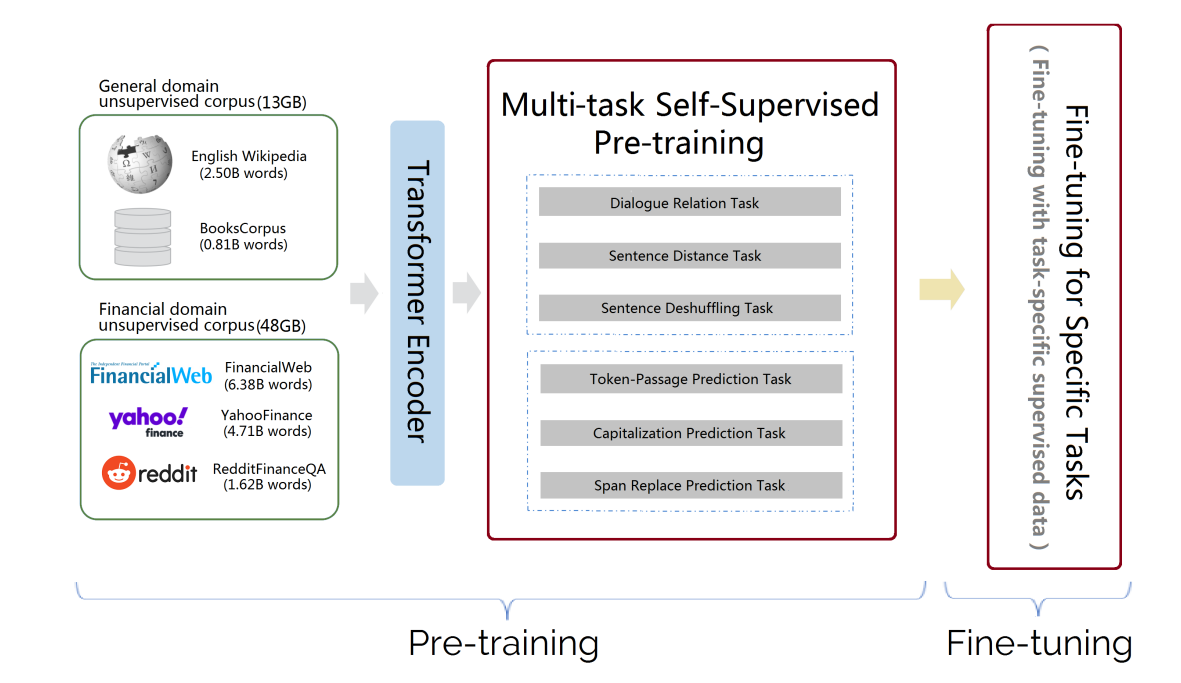

FinBERT aquitetura de pre-treinamento [[1]](#scrollTo=Refer_ncias)

## **Idiomas Suportados**

Originalmente o FinBERT foi treinado apenas em textos em inglês, assim como o BERT. No entanto, posteriormente os pesquisadores lançaram versoes treinadas em outros idiomas inclusive o portugues brasileiro, feito pelo grupo de inteligencia artifical da USP (Turing USP) [[6]](#scrollTo=Refer_ncias).

## **Aplicacoes da analise de sentimento**



Encontrar correlacoes entre eventos e sentimentos do mercado financeiro.

# **Exemplo de Aplicação**


Utilizar analise de sentimentos de tweets para testar correlacao entre preco dos sentimentos.

# **Exemplo de Código**

## Instalacao de dependencias

In [ ]:
!pip install transformers

## Configuracao do pytorch para apresentacao de resultados deterministicos

In [ ]:
import random
import os
import numpy as np
import torch

master_seed = 1984

random.seed(master_seed)
os.environ['PYTHONHASHSEED'] = str(master_seed)
np.random.seed(master_seed)
torch.manual_seed(master_seed)
torch.cuda.manual_seed(master_seed)
torch.backends.cudnn.deterministic = True

## Configuracao do uso da GPU (⚠️ Habilite a GPU no COLAB )

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Dispositivo utilizado: {device} \n')

if device.type == 'cuda':
    print(f'{torch.cuda.get_device_name(0)} \n'
          f'Memoria Alocada: {round(torch.cuda.memory_allocated(0)/1024**2, 1)} MB \n'
          f'Memoria em Cache: {round(torch.cuda.memory_reserved(0)/1024**2, 1)} MB')

## Exemplo de analise de sentimento com FinBERT

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Download e inicializacao do modelo na gpu
finbert_model = BertForSequenceClassification.from_pretrained('turing-usp/FinBertPTBR').to(device)
tokenizer = BertTokenizer.from_pretrained('turing-usp/FinBertPTBR')

In [ ]:
# Classificador de sentencas utilizando o modelo finbert pt-br e acelaracao de GPU
classifier = pipeline("sentiment-analysis",
                      model=finbert_model,
                      tokenizer=tokenizer,
                      device=device)

# Sentencas de exemplo
sample_sentences = ["O Nubank decidiu cortar a faixa de preço da oferta pública inicial (IPO) após revés no humor dos mercados internacionais com as fintechs.", 
                    "O futuro de DI caiu 20 bps nesta manhã",
                    "O Ibovespa acompanha correção do mercado e fecha com alta moderada"]

# Classificacao das sentencas
classified_sentences = classifier(sample_sentences)

# Organizacao da classificacao e sentencas em um dataframe
classified_sentences_df = pd.DataFrame(classified_sentences)
classified_sentences_df['sentence'] = sample_sentences

classified_sentences_df

## Exemplo de teste de correlacao entre sentimento e preco

In [ ]:
classified_sentences_df.corr()

# **Uma ideia de Projeto de Aplicação**



1 - Adquirir tweets que falam sobre a petrobras.

2 - Realizar analise de sentimento nos tweets com FinBERT.

3 - Testar correlacao entre o preco da acao e o sentimento. 

4 - Caso possua uma boa correlacao, estudar essa nova feature para utilizar em futuros trabalhos para predicoes de precos da acao da petrobras.


## **Link da aplicacao**

Colab: 

## **Video Explicativo**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('uj4hm7Lr2Wo')

# **Conclusão** 




Apresente a conclusão do seu estudo. Indique limitações da tecnologia/conceitos, novos avanços e compare com tecnologias/conceitos concorrentes.

introducao

limitacaoes

Novos avancos

Tecnologias concorrentes

## Limitacoes 
Um problema dos modelos Transformers citados até agora é que apesar de performarem melhor do que os modelos baseados em redes recorrentes, a complexidade computacional da atenção cresce com o quadrado do tamanho do texto, ficando inviável o uso para textos longos. O BERT por exemplo, tem uma limitação do tamanho da entrada de 512 tokens, que daria um pouco menos do que esse número em palavras, já que uma palavra pode ser constituída de mais de um token.

## Novos Avancos

# **Referências**



[1] HUANG, A.; WANG, H.; YANG, Y. FinBERT—A deep learning approach to extracting textual information. SSRN Electronic Journal, 2020.

[2] ZOU, Y.; HERREMANS, D. A multimodal model with Twitter FinBERT embeddings for extreme price movement prediction of Bitcoin. 2022. Disponível em: <http://arxiv.org/abs/2206.00648>.

[3] PENG, B. et al. Is domain adaptation worth your investment? Comparing BERT and FinBERT on financial tasks. Proceedings of the Third Workshop on Economics and Natural Language Processing. Anais...Stroudsburg, PA, USA: Association for Computational Linguistics, 2021.

[4] JAHAN, M. S.; OUSSALAH, M.; ARHAB, N. Finnish hate-speech detection on social media using CNN and FinBERT. Proceedings of the Thirteenth Language Resources and Evaluation Conference. Anais...Marseille, France: European Language Resources Association, 2022.

[5] CHENG, W.; CHEN, S. Sentiment analysis of financial texts based on attention mechanism of FinBERT and BiLSTM. 2021 International Conference on Computer Engineering and Application (ICCEA). Anais...IEEE, 2021.

[6] FinBERT PT-BR. Hugging Face. Disponível em: <https://huggingface.co/turing-usp/FinBertPTBR>. Acesso em: 11 nov. 2022.

[7] SIDOGI, T.; MBUVHA, R.; MARWALA, T. Stock price prediction using sentiment analysis. 2021 IEEE International Conference on Systems, Man, and Cybernetics (SMC). Anais...IEEE, 2021.